In [1]:
import pandas as pd

df = pd.read_csv('data/산재보상2.csv', encoding='utf-8-sig')

In [2]:


import rhinoMorph
rn = rhinoMorph.startRhino()

#stop_words = "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 해주시 때 임"
stop_words= "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 해주시 때 임 하 있 되 않 었 사람 지 보 때 같 년 대하 주 말 일 위하 때문 말하 가 받 그렇 알 하 경우 가요"
stop_words = stop_words.split(' ')
stop_words[0:10]

filepath:  C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages
classpath:  C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages\rhinoMorph/lib/rhino.jar
RHINO started!


['은', '이', '것', '등', '더', '를', '좀', '즉', '인', '옹']

In [3]:
df

,Unnamed: 0,URL 주소,댓글작성자명,댓글작성일자,댓글 내용
0,0,https://www.youtube.com//watch?v=lgf1wMyk3BQ,직장인방송,1년 전(수정됨),산재치료 중 회사에서 퇴사를 강요 한다면 이렇게 대응하세요https://www.yo...
1,1,https://www.youtube.com//watch?v=lgf1wMyk3BQ,Eud8di Kee,1년 전(수정됨),직방님 저는 7월20일에 산재신청이 되었는데 아직도 처리중이라고 나오는데요직방님은 ...
2,2,https://www.youtube.com//watch?v=lgf1wMyk3BQ,다크패밀리,1년 전,좋은정보 감사합니다.저도 왼쪽 팔꿈치와 손목관절 골절로 요양 중입니다.아무래도 휴...
3,3,https://www.youtube.com//watch?v=lgf1wMyk3BQ,최수원,1년 전,안녕하세요 전에도 한번 질문 했었는데 다시 한번 질문 드려요.. 지금까지 병원비가 ...
4,4,https://www.youtube.com//watch?v=lgf1wMyk3BQ,주시영,3주 전,좋은정보 감사합니다^^현재 저도 오른손 검지 첫마디 바로 위쪽이 아예 절단되어 혈관...
...,...,...,...,...,...
800,800,https://www.youtube.com//watch?v=E1LPrpc3RFI,데헷,4개월 전,많은 도움 되었습니다~ 감사합니다.
801,801,https://www.youtube.com//watch?v=E1LPrpc3RFI,내일은벼락부자,9개월 전,유익한 영상 감사합니다.
802,802,https://www.youtube.com//watch?v=gm2GlU6uCq0,momom mm,1년 전,혹시 모르니 조모씨 한번 털어 보면 어떨까요?지금 분위기 봐서는 뭔가 나올거같아
803,803,https://www.youtube.com//watch?v=-Z_phlCGA74,김옥이,3년 전,산재를합이를해는데연금으로받기로해는데


In [4]:
import re
answer_sentences = []
for post in df['댓글 내용']:
    answer_sentences.extend(re.split('; |\.|\?|\!', post))
#title_sentences[0:100]


answer_sentences_nouns = []

for senten in answer_sentences:
    morphed_data_sentences = [noun_answer for noun_answer in rhinoMorph.onlyMorph_list(rn, senten, pos=['NNG', 'NNP'],combineN=True) if noun_answer not in stop_words]
    answer_sentences_nouns.append(morphed_data_sentences)
#sentences_nouns


answer_sentences_nouns_result = []

for i in answer_sentences_nouns:
    senten_list=[]
    for j in i:
        if len(j)== 1:
            continue
        senten_list.append(j)
    answer_sentences_nouns_result.append(senten_list)
#sentences_nouns_result

answer_result = []

for i in answer_sentences_nouns_result:
    if len(i) ==0:
        continue
    i = " ".join(i)
    answer_result.append(i)

#title_result

answer_result= ",".join(answer_result)
answer_result = answer_result.replace(","," ")
#title_result

final_answer = answer_result.split(" ")
#final_title

from collections import Counter

wordInfo_answer = Counter(final_answer)
#wordInfo_title

answer_top50 = dict(wordInfo_answer.most_common(50))
answer_top50

{'회사': 205,
 '산재': 192,
 '정답': 140,
 '병원': 81,
 '산재보험': 65,
 '안녕': 63,
 '영상': 62,
 '산재처리': 62,
 '신청': 58,
 '치료': 53,
 '보상': 52,
 '정보': 51,
 '프리랜서': 43,
 '상태': 41,
 '사고': 41,
 '정도': 41,
 '수술': 39,
 '산재신청': 38,
 '지금': 37,
 '본인': 36,
 '노무사': 36,
 '상황': 35,
 '부분': 35,
 '승인': 34,
 '골절': 33,
 '시간': 33,
 '업무': 33,
 '도움': 30,
 '문제': 30,
 '생각': 30,
 '코로나': 30,
 '휴업급여': 28,
 '아버지': 28,
 '감사': 27,
 '직장': 26,
 '구독': 26,
 '입원': 26,
 '근로자': 26,
 '특고': 26,
 '가능': 25,
 '손가락': 25,
 '상담': 25,
 '선생': 25,
 '질문': 24,
 '은정': 23,
 '급여': 23,
 '부탁': 23,
 '사장': 23,
 '근무': 23,
 '현장': 23}

In [5]:
answer_top30 = dict(wordInfo_answer.most_common(30))
answer_top30

{'회사': 205,
 '산재': 192,
 '정답': 140,
 '병원': 81,
 '산재보험': 65,
 '안녕': 63,
 '영상': 62,
 '산재처리': 62,
 '신청': 58,
 '치료': 53,
 '보상': 52,
 '정보': 51,
 '프리랜서': 43,
 '상태': 41,
 '사고': 41,
 '정도': 41,
 '수술': 39,
 '산재신청': 38,
 '지금': 37,
 '본인': 36,
 '노무사': 36,
 '상황': 35,
 '부분': 35,
 '승인': 34,
 '골절': 33,
 '시간': 33,
 '업무': 33,
 '도움': 30,
 '문제': 30,
 '생각': 30}

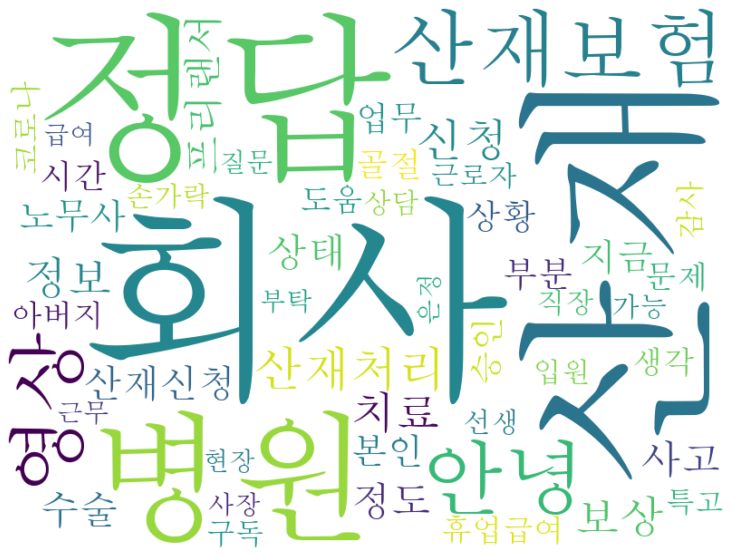

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud = WordCloud(font_path='C:/windows/fonts/batang.ttc', width=800, height=600,background_color='white').generate_from_frequencies(answer_top50)
plt.figure(figsize=(30,10))
plt.imshow(cloud, interpolation='bilinear')  # 글자를 더 부드럽게 나오게 한다
plt.axis('off')                              # X축과 Y축의 위치 정보 off
plt.show()

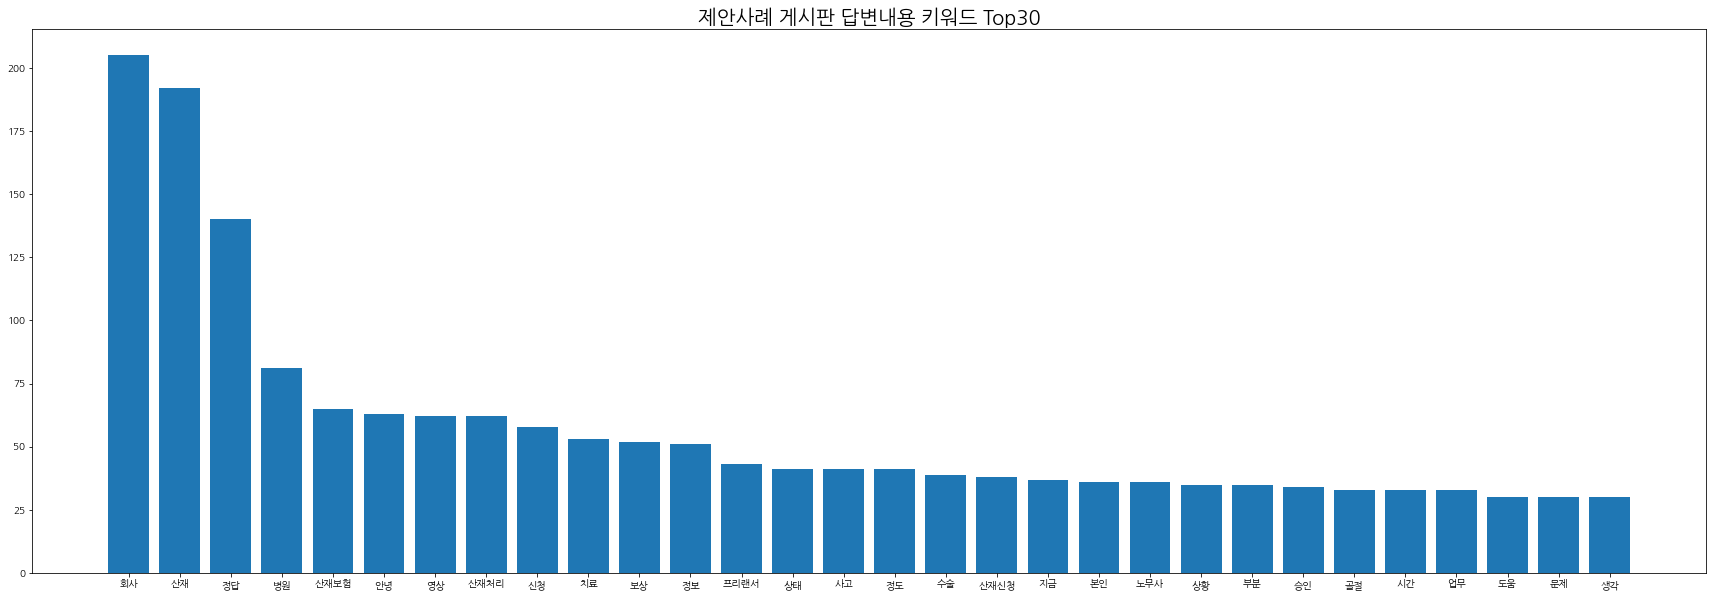

In [7]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
# font_location = '/usr/share/fonts/truetype/nanum/NanumGothicOTF.ttf'
font_location = 'C:/Windows/Fonts/NanumGothic.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

top_title_keys=[i for i in answer_top50.keys()]
top_title_values=[i for i in answer_top50.values()]

plt.figure(figsize= (30,10))
plt.title("제안사례 게시판 답변내용 키워드 Top30", fontsize=20)
plt.bar(list(top_title_keys[:30]), list(top_title_values[:30]))
plt.show()

In [8]:
#content_top_100 

answer_top50_word2id = {w: i for i, w in enumerate(answer_top50.keys())}
answer_top50_word2id

{'회사': 0,
 '산재': 1,
 '정답': 2,
 '병원': 3,
 '산재보험': 4,
 '안녕': 5,
 '영상': 6,
 '산재처리': 7,
 '신청': 8,
 '치료': 9,
 '보상': 10,
 '정보': 11,
 '프리랜서': 12,
 '상태': 13,
 '사고': 14,
 '정도': 15,
 '수술': 16,
 '산재신청': 17,
 '지금': 18,
 '본인': 19,
 '노무사': 20,
 '상황': 21,
 '부분': 22,
 '승인': 23,
 '골절': 24,
 '시간': 25,
 '업무': 26,
 '도움': 27,
 '문제': 28,
 '생각': 29,
 '코로나': 30,
 '휴업급여': 31,
 '아버지': 32,
 '감사': 33,
 '직장': 34,
 '구독': 35,
 '입원': 36,
 '근로자': 37,
 '특고': 38,
 '가능': 39,
 '손가락': 40,
 '상담': 41,
 '선생': 42,
 '질문': 43,
 '은정': 44,
 '급여': 45,
 '부탁': 46,
 '사장': 47,
 '근무': 48,
 '현장': 49}

In [9]:
#content_top_100 

answer_top30_word2id = {w: i for i, w in enumerate(answer_top30.keys())}
answer_top30_word2id

{'회사': 0,
 '산재': 1,
 '정답': 2,
 '병원': 3,
 '산재보험': 4,
 '안녕': 5,
 '영상': 6,
 '산재처리': 7,
 '신청': 8,
 '치료': 9,
 '보상': 10,
 '정보': 11,
 '프리랜서': 12,
 '상태': 13,
 '사고': 14,
 '정도': 15,
 '수술': 16,
 '산재신청': 17,
 '지금': 18,
 '본인': 19,
 '노무사': 20,
 '상황': 21,
 '부분': 22,
 '승인': 23,
 '골절': 24,
 '시간': 25,
 '업무': 26,
 '도움': 27,
 '문제': 28,
 '생각': 29}

In [10]:

answer_top30_word2id = {w: i for i, w in enumerate(answer_top30.keys())}
answer_top30_word2id

{'회사': 0,
 '산재': 1,
 '정답': 2,
 '병원': 3,
 '산재보험': 4,
 '안녕': 5,
 '영상': 6,
 '산재처리': 7,
 '신청': 8,
 '치료': 9,
 '보상': 10,
 '정보': 11,
 '프리랜서': 12,
 '상태': 13,
 '사고': 14,
 '정도': 15,
 '수술': 16,
 '산재신청': 17,
 '지금': 18,
 '본인': 19,
 '노무사': 20,
 '상황': 21,
 '부분': 22,
 '승인': 23,
 '골절': 24,
 '시간': 25,
 '업무': 26,
 '도움': 27,
 '문제': 28,
 '생각': 29}

In [11]:
answer_top50_id2word = {i: w for i, w in enumerate(answer_top50.keys())}
answer_top50_id2word

{0: '회사',
 1: '산재',
 2: '정답',
 3: '병원',
 4: '산재보험',
 5: '안녕',
 6: '영상',
 7: '산재처리',
 8: '신청',
 9: '치료',
 10: '보상',
 11: '정보',
 12: '프리랜서',
 13: '상태',
 14: '사고',
 15: '정도',
 16: '수술',
 17: '산재신청',
 18: '지금',
 19: '본인',
 20: '노무사',
 21: '상황',
 22: '부분',
 23: '승인',
 24: '골절',
 25: '시간',
 26: '업무',
 27: '도움',
 28: '문제',
 29: '생각',
 30: '코로나',
 31: '휴업급여',
 32: '아버지',
 33: '감사',
 34: '직장',
 35: '구독',
 36: '입원',
 37: '근로자',
 38: '특고',
 39: '가능',
 40: '손가락',
 41: '상담',
 42: '선생',
 43: '질문',
 44: '은정',
 45: '급여',
 46: '부탁',
 47: '사장',
 48: '근무',
 49: '현장'}

In [12]:
answer_top30_id2word = {i: w for i, w in enumerate(answer_top30.keys())}
answer_top30_id2word

{0: '회사',
 1: '산재',
 2: '정답',
 3: '병원',
 4: '산재보험',
 5: '안녕',
 6: '영상',
 7: '산재처리',
 8: '신청',
 9: '치료',
 10: '보상',
 11: '정보',
 12: '프리랜서',
 13: '상태',
 14: '사고',
 15: '정도',
 16: '수술',
 17: '산재신청',
 18: '지금',
 19: '본인',
 20: '노무사',
 21: '상황',
 22: '부분',
 23: '승인',
 24: '골절',
 25: '시간',
 26: '업무',
 27: '도움',
 28: '문제',
 29: '생각'}

In [13]:
import numpy as np

# 50 단어 인접행렬
answer_adjacent_matrix_50 = np.zeros((50, 50), int)
for sentence in answer_sentences_nouns_result:
    for wi, i in answer_top50_word2id.items():
        if wi in sentence:
            for wj, j in answer_top50_word2id.items():
                if i != j and wj in sentence:
                    answer_adjacent_matrix_50[i][j] += 1
answer_adjacent_matrix_50

array([[ 0, 31,  1, ...,  3,  3,  1],
       [31,  0,  0, ...,  2,  3,  5],
       [ 1,  0,  0, ...,  0,  0,  0],
       ...,
       [ 3,  2,  0, ...,  0,  0,  0],
       [ 3,  3,  0, ...,  0,  0,  0],
       [ 1,  5,  0, ...,  0,  0,  0]])

In [14]:
answer_sentences_nouns_result

[['산재치료', '회사', '퇴사', '강요'],
 [],
 [],
 ['근로복지공단', '요양급여신청서', '휴업급여청구서'],
 [],
 [],
 [],
 ['직방', '산재신청', '처리', '직방', '승인', '몇일'],
 [],
 ['은정'],
 ['왼쪽', '팔꿈치', '손목관절', '골절', '요양'],
 ['장해',
  '남을',
  '장해보상',
  '신청',
  '요양기간',
  '후에',
  '가능',
  '골절',
  '금속',
  '제거',
  '수술',
  '후에가능'],
 ['요양기간', '치료', '종결', '차후', '관절', '금속제거', '수술', '산재신청'],
 [],
 ['안녕', '질문', '질문'],
 [],
 ['지금', '병원비', '급여'],
 ['지불'],
 [],
 [],
 ['보상'],
 [],
 ['은정', '오른손', '검지', '첫마디', '위쪽', '혈관', '신경', '접합수술', '중지', '첫마디', '개방', '골절'],
 ['중지',
  '저번주',
  '검지',
  '이번주',
  '제거',
  '재활',
  '절단',
  '부위',
  '통증',
  '접합',
  '수술',
  '외관',
  '손가락',
  '나중',
  '걱정',
  '등급',
  '보통'],
 ['장해급여', '평균임금등급', '평균임금', '휴업급여', '일평균'],
 [],
 ['회사', '임직원', '단체보험', '별도', '가입'],
 ['삼성'],
 ['교보'],
 ['손보사', '다면대부분', '보험', '수급자', '회사', '확률'],
 ['참고'],
 [],
 [],
 [],
 [],
 [],
 ['영상'],
 ['산재보장', '신청방법'],
 [],
 ['안녕'],
 [],
 [],
 ['도움'],
 ['회사', '입장', '인사과', '상황', '근로복지공단', '본인', '상태', '아내'],
 ['안녕'],
 [],
 [],
 ['손가락', '다처', '산재처리'],
 ['전치', '손가락'

In [15]:
import numpy as np

# 50 단어 인접행렬
answer_adjacent_matrix_30 = np.zeros((30, 30), int)
for sentence in answer_sentences_nouns_result:
    for wi, i in answer_top30_word2id.items():
        if wi in sentence:
            for wj, j in answer_top30_word2id.items():
                if i != j and wj in sentence:
                    answer_adjacent_matrix_30[i][j] += 1
answer_adjacent_matrix_30

array([[ 0, 31,  1, 10,  3,  6,  5, 11,  9, 10,  5,  1,  0,  3, 10,  6,
         5, 11,  9,  3,  6,  5,  8,  9,  1,  4,  6,  2,  5,  3],
       [31,  0,  0,  8,  4,  7,  5,  3, 22, 14, 10,  2,  0,  4,  4,  5,
         5,  3,  6,  2,  8,  6,  1,  8,  4,  4,  3,  4,  2,  3],
       [ 1,  0,  0,  0, 23,  0, 14,  0,  1,  0,  2, 15, 30,  1,  1,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  5,  0,  0],
       [10,  8,  0,  0,  1,  1,  1, 10,  2,  6,  0,  0,  0,  3,  1,  1,
         4,  4,  5,  1,  2,  2,  0,  2,  3,  2,  4,  1,  1,  0],
       [ 3,  4, 23,  1,  0,  0,  5,  1,  1,  0,  1,  4, 11,  0,  1,  1,
         2,  0,  1,  0,  0,  0,  0,  0,  2,  1,  0,  1,  0,  0],
       [ 6,  7,  0,  1,  0,  0,  2,  1,  4,  3,  1,  3,  0,  4,  2,  1,
         2,  1,  2,  0,  5,  0,  1,  1,  1,  0,  0,  1,  1,  0],
       [ 5,  5, 14,  1,  5,  2,  0,  1,  2,  0,  0,  3,  2,  1,  2,  0,
         0,  1,  0,  0,  3,  0,  0,  0,  1,  1,  1,  5,  1,  1],
       [11,  3,  0, 10,  1,  1,  1,  0,  

In [16]:
answer_adjacent_matrix_50.shape, answer_adjacent_matrix_30.shape

((50, 50), (30, 30))

In [17]:
import networkx as nx
answer_network_30 = nx.from_numpy_matrix(answer_adjacent_matrix_30)
list(answer_network_30.adjacency())

[(0,
  {1: {'weight': 31},
   2: {'weight': 1},
   3: {'weight': 10},
   4: {'weight': 3},
   5: {'weight': 6},
   6: {'weight': 5},
   7: {'weight': 11},
   8: {'weight': 9},
   9: {'weight': 10},
   10: {'weight': 5},
   11: {'weight': 1},
   13: {'weight': 3},
   14: {'weight': 10},
   15: {'weight': 6},
   16: {'weight': 5},
   17: {'weight': 11},
   18: {'weight': 9},
   19: {'weight': 3},
   20: {'weight': 6},
   21: {'weight': 5},
   22: {'weight': 8},
   23: {'weight': 9},
   24: {'weight': 1},
   25: {'weight': 4},
   26: {'weight': 6},
   27: {'weight': 2},
   28: {'weight': 5},
   29: {'weight': 3}}),
 (1,
  {0: {'weight': 31},
   3: {'weight': 8},
   4: {'weight': 4},
   5: {'weight': 7},
   6: {'weight': 5},
   7: {'weight': 3},
   8: {'weight': 22},
   9: {'weight': 14},
   10: {'weight': 10},
   11: {'weight': 2},
   13: {'weight': 4},
   14: {'weight': 4},
   15: {'weight': 5},
   16: {'weight': 5},
   17: {'weight': 3},
   18: {'weight': 6},
   19: {'weight': 2},
   20

In [18]:
answer_network_50 = nx.from_numpy_matrix(answer_adjacent_matrix_50)
list(answer_network_50.adjacency())

[(0,
  {1: {'weight': 31},
   2: {'weight': 1},
   3: {'weight': 10},
   4: {'weight': 3},
   5: {'weight': 6},
   6: {'weight': 5},
   7: {'weight': 11},
   8: {'weight': 9},
   9: {'weight': 10},
   10: {'weight': 5},
   11: {'weight': 1},
   13: {'weight': 3},
   14: {'weight': 10},
   15: {'weight': 6},
   16: {'weight': 5},
   17: {'weight': 11},
   18: {'weight': 9},
   19: {'weight': 3},
   20: {'weight': 6},
   21: {'weight': 5},
   22: {'weight': 8},
   23: {'weight': 9},
   24: {'weight': 1},
   25: {'weight': 4},
   26: {'weight': 6},
   27: {'weight': 2},
   28: {'weight': 5},
   29: {'weight': 3},
   31: {'weight': 5},
   32: {'weight': 4},
   33: {'weight': 2},
   34: {'weight': 4},
   35: {'weight': 1},
   36: {'weight': 6},
   37: {'weight': 5},
   39: {'weight': 2},
   40: {'weight': 4},
   41: {'weight': 3},
   43: {'weight': 5},
   45: {'weight': 4},
   46: {'weight': 1},
   47: {'weight': 3},
   48: {'weight': 3},
   49: {'weight': 1}}),
 (1,
  {0: {'weight': 31},
 

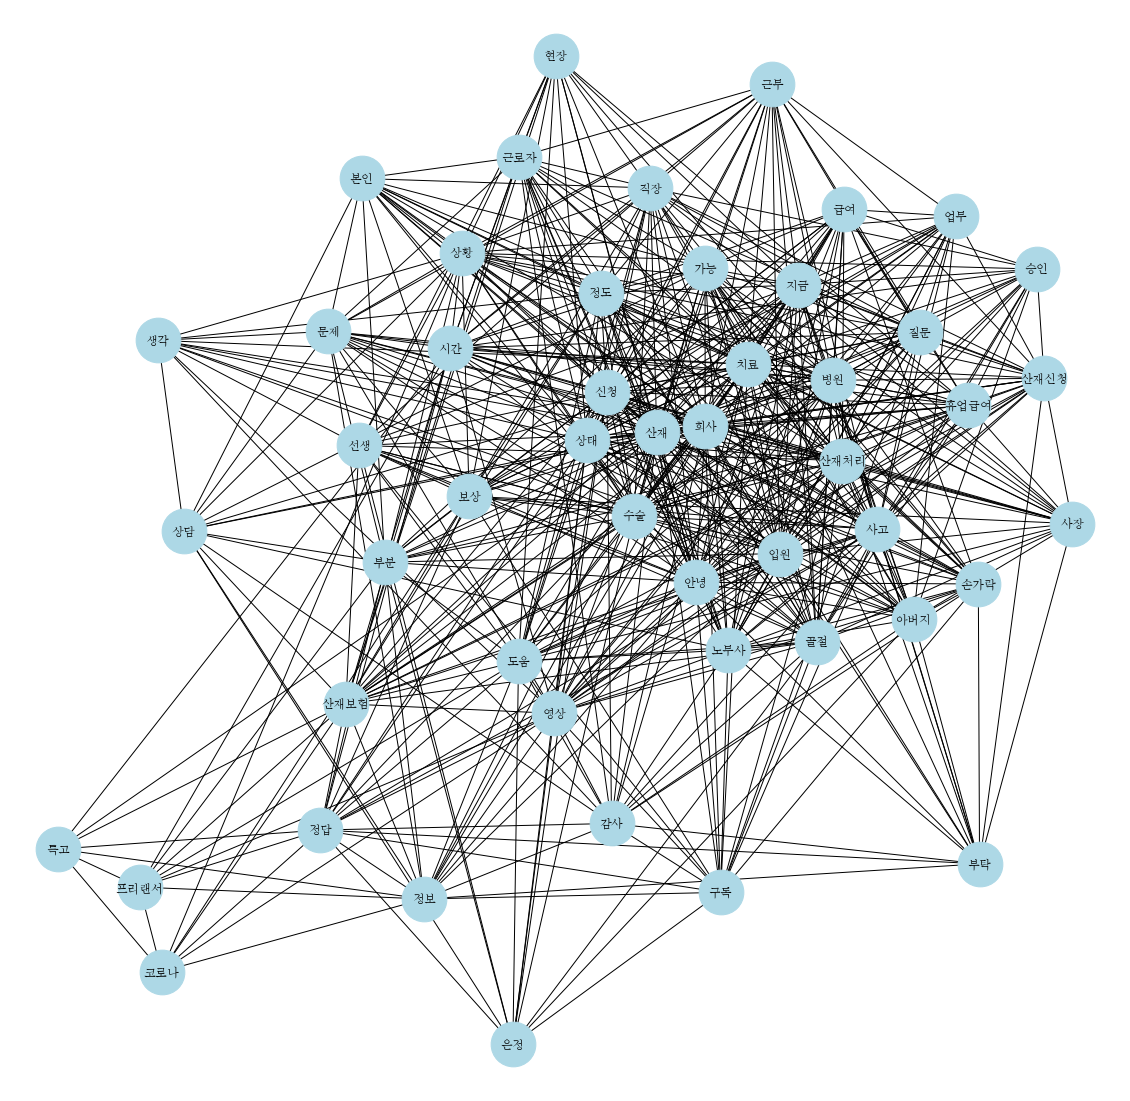

In [19]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path="C:/Windows/Fonts/batang.ttc"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(20, 20)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'size' : 2
}

'''
# 키워드 50개로 네트워크
'''

#G1=nx.Graph(san_network, labels=san_id2word, font_family=font_name, ax=ax)
nx.draw(answer_network_50, labels=answer_top50_id2word, font_family=font_name, ax=ax, **option)
#nx.draw(san_network, labels=san_id2word, font_family=font_name, ax=ax, **option)

#nx.write_graphml(G1, 'graphfile.graphml')
#nx.write_gexf(G1, 'sanjae_insurance.gexf')
plt.show()

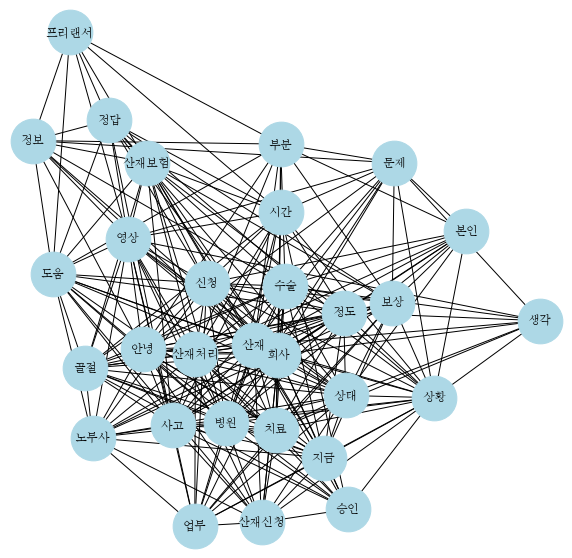

In [20]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path="C:/Windows/Fonts/batang.ttc"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'size' : 2
}

'''
# 키워드 30개로 네트워크
'''

#G1=nx.Graph(san_network, labels=san_id2word, font_family=font_name, ax=ax)
nx.draw(answer_network_30, labels=answer_top30_id2word, font_family=font_name, ax=ax, **option)
#nx.draw(san_network, labels=san_id2word, font_family=font_name, ax=ax, **option)

#nx.write_graphml(G1, 'graphfile.graphml')
#nx.write_gexf(G1, 'sanjae_insurance.gexf')
plt.show()

# 근접중심성

In [21]:
#Closeness
nx.closeness_centrality(answer_network_50, distance='weight')

{0: 0.494949494949495,
 1: 0.3828125,
 2: 0.5384615384615384,
 3: 0.5444444444444444,
 4: 0.5764705882352941,
 5: 0.5975609756097561,
 6: 0.5384615384615384,
 7: 0.5833333333333334,
 8: 0.5384615384615384,
 9: 0.5444444444444444,
 10: 0.550561797752809,
 11: 0.5444444444444444,
 12: 0.44954128440366975,
 13: 0.5632183908045977,
 14: 0.5697674418604651,
 15: 0.532608695652174,
 16: 0.5632183908045977,
 17: 0.5568181818181818,
 18: 0.550561797752809,
 19: 0.5384615384615384,
 20: 0.5568181818181818,
 21: 0.5903614457831325,
 22: 0.5632183908045977,
 23: 0.5384615384615384,
 24: 0.5833333333333334,
 25: 0.5903614457831325,
 26: 0.5268817204301075,
 27: 0.5903614457831325,
 28: 0.5697674418604651,
 29: 0.5268817204301075,
 30: 0.3983739837398374,
 31: 0.5212765957446809,
 32: 0.5568181818181818,
 33: 0.5384615384615384,
 34: 0.5764705882352941,
 35: 0.5268817204301075,
 36: 0.6447368421052632,
 37: 0.5697674418604651,
 38: 0.4016393442622951,
 39: 0.5632183908045977,
 40: 0.538461538461538

In [22]:
#Closeness
nx.closeness_centrality(answer_network_30, distance='weight')

{0: 0.43283582089552236,
 1: 0.3670886075949367,
 2: 0.5178571428571429,
 3: 0.5471698113207547,
 4: 0.5576923076923077,
 5: 0.5918367346938775,
 6: 0.58,
 7: 0.5918367346938775,
 8: 0.5,
 9: 0.5178571428571429,
 10: 0.5370370370370371,
 11: 0.5087719298245614,
 12: 0.48333333333333334,
 13: 0.5576923076923077,
 14: 0.5471698113207547,
 15: 0.5471698113207547,
 16: 0.5178571428571429,
 17: 0.5576923076923077,
 18: 0.48333333333333334,
 19: 0.5272727272727272,
 20: 0.5370370370370371,
 21: 0.6304347826086957,
 22: 0.5471698113207547,
 23: 0.5178571428571429,
 24: 0.5272727272727272,
 25: 0.6041666666666666,
 26: 0.5087719298245614,
 27: 0.6170212765957447,
 28: 0.5576923076923077,
 29: 0.5087719298245614}

# 연결중심성

In [23]:
#Degree
nx.degree_centrality(answer_network_50)

{0: 0.8979591836734693,
 1: 0.8979591836734693,
 2: 0.3877551020408163,
 3: 0.7142857142857142,
 4: 0.5306122448979591,
 5: 0.673469387755102,
 6: 0.5714285714285714,
 7: 0.6530612244897959,
 8: 0.6938775510204082,
 9: 0.6530612244897959,
 10: 0.4693877551020408,
 11: 0.36734693877551017,
 12: 0.18367346938775508,
 13: 0.6530612244897959,
 14: 0.6122448979591836,
 15: 0.5510204081632653,
 16: 0.6326530612244897,
 17: 0.4693877551020408,
 18: 0.5918367346938775,
 19: 0.36734693877551017,
 20: 0.5510204081632653,
 21: 0.5306122448979591,
 22: 0.36734693877551017,
 23: 0.3469387755102041,
 24: 0.6122448979591836,
 25: 0.5102040816326531,
 26: 0.3877551020408163,
 27: 0.5102040816326531,
 28: 0.4081632653061224,
 29: 0.26530612244897955,
 30: 0.16326530612244897,
 31: 0.4693877551020408,
 32: 0.4897959183673469,
 33: 0.36734693877551017,
 34: 0.4897959183673469,
 35: 0.3469387755102041,
 36: 0.6530612244897959,
 37: 0.42857142857142855,
 38: 0.14285714285714285,
 39: 0.5102040816326531,
 4

In [24]:
#Degree
nx.degree_centrality(answer_network_30)

{0: 0.9655172413793103,
 1: 0.9310344827586207,
 2: 0.41379310344827586,
 3: 0.7931034482758621,
 4: 0.5862068965517241,
 5: 0.7241379310344828,
 6: 0.6896551724137931,
 7: 0.6896551724137931,
 8: 0.6896551724137931,
 9: 0.6896551724137931,
 10: 0.5862068965517241,
 11: 0.3793103448275862,
 12: 0.24137931034482757,
 13: 0.7241379310344828,
 14: 0.7241379310344828,
 15: 0.6896551724137931,
 16: 0.7241379310344828,
 17: 0.5172413793103449,
 18: 0.6206896551724138,
 19: 0.41379310344827586,
 20: 0.5172413793103449,
 21: 0.6551724137931034,
 22: 0.41379310344827586,
 23: 0.41379310344827586,
 24: 0.6206896551724138,
 25: 0.5862068965517241,
 26: 0.48275862068965514,
 27: 0.6206896551724138,
 28: 0.4482758620689655,
 29: 0.3103448275862069}

# 위세중심성

In [25]:
#Eigenvector
nx.eigenvector_centrality(answer_network_50, weight='weight')

{0: 0.44570037083714076,
 1: 0.4593121477914976,
 2: 0.14445251715404323,
 3: 0.2057326496604397,
 4: 0.13596248745014541,
 5: 0.13868656281308567,
 6: 0.12994055293300985,
 7: 0.15364425961132278,
 8: 0.24714687129087115,
 9: 0.21893400905438043,
 10: 0.11939700278427018,
 11: 0.06803060899507458,
 12: 0.09314633211409802,
 13: 0.10422418615266173,
 14: 0.14705817543777688,
 15: 0.13061729463723462,
 16: 0.12900853093366668,
 17: 0.1256329369241015,
 18: 0.15882123787439228,
 19: 0.06283843771581915,
 20: 0.13089040756093537,
 21: 0.09399572591510329,
 22: 0.07132332585370432,
 23: 0.12183615701201353,
 24: 0.10136514759877063,
 25: 0.08250453949682278,
 26: 0.09745351481505893,
 27: 0.08214228865878892,
 28: 0.06098483236780592,
 29: 0.04498004812548187,
 30: 0.06230589659400828,
 31: 0.10432450736926249,
 32: 0.08413012687587869,
 33: 0.05921171616884504,
 34: 0.10187142252595706,
 35: 0.04477072164510741,
 36: 0.12252270787902161,
 37: 0.0672103771010611,
 38: 0.0719619075461778,
 

In [26]:
#Eigenvector
nx.eigenvector_centrality(answer_network_30, weight='weight')

{0: 0.4824514433339097,
 1: 0.48588786198237177,
 2: 0.12129783248469397,
 3: 0.21644873609355123,
 4: 0.12296000681729158,
 5: 0.14912201080809573,
 6: 0.13245454302385856,
 7: 0.16423637729842916,
 8: 0.25831454474973764,
 9: 0.236914951542391,
 10: 0.13873866419153483,
 11: 0.06339921865017077,
 12: 0.0699836798543534,
 13: 0.10804259424023338,
 14: 0.16899927267220463,
 15: 0.1445954039990568,
 16: 0.13717934698562184,
 17: 0.13733501276366616,
 18: 0.17563753806695315,
 19: 0.06818629492967841,
 20: 0.14182992244825623,
 21: 0.10456925812557633,
 22: 0.07912189057318818,
 23: 0.13893228807176014,
 24: 0.10549483249130426,
 25: 0.08700042205618332,
 26: 0.1119633620634628,
 27: 0.08836723788591523,
 28: 0.06501019610928875,
 29: 0.04994530769438754}

# 근접중심성

In [27]:
#Current Flow Closeness
nx.current_flow_closeness_centrality(answer_network_50)

{0: 0.27866852369865164,
 1: 0.2788987047480669,
 2: 0.19524484530283423,
 3: 0.25700607016204563,
 4: 0.22833223581444612,
 5: 0.2517498267399403,
 6: 0.23600865128778933,
 7: 0.24860948664869134,
 8: 0.2547262238780135,
 9: 0.24857265240958545,
 10: 0.21618386437225887,
 11: 0.18960375701893073,
 12: 0.12155786205419743,
 13: 0.24873162391824755,
 14: 0.242525412209119,
 15: 0.2319346514668586,
 16: 0.24574521710469518,
 17: 0.21557728001179752,
 18: 0.23857235582302705,
 19: 0.19079496978760438,
 20: 0.23171563244428978,
 21: 0.22836335688207673,
 22: 0.19100749556730628,
 23: 0.18518106097043896,
 24: 0.24240289689440583,
 25: 0.22460879954641635,
 26: 0.19637521099050567,
 27: 0.22475892912765044,
 28: 0.20174556277200406,
 29: 0.15876048949979443,
 30: 0.111882049375145,
 31: 0.21568156500264604,
 32: 0.2198823149131297,
 33: 0.1908358247292925,
 34: 0.21997545771309426,
 35: 0.18526192570019415,
 36: 0.24902353408225278,
 37: 0.20662098642178933,
 38: 0.10127817649914102,
 39: 0

In [28]:
#Current Flow Closeness
nx.current_flow_closeness_centrality(answer_network_30)

{0: 0.3502167534285353,
 1: 0.34524902385314016,
 2: 0.23343593939131543,
 3: 0.3231601833899558,
 4: 0.2819865456869235,
 5: 0.3112514922395347,
 6: 0.3048138154015583,
 7: 0.3042465537568173,
 8: 0.304500041613452,
 9: 0.3038292327158573,
 10: 0.2821156839598603,
 11: 0.2210156893091037,
 12: 0.1633660654878768,
 13: 0.31086537726959984,
 14: 0.310860257995363,
 15: 0.30418935046439605,
 16: 0.3112317916803332,
 17: 0.2640605418106671,
 18: 0.2889043036936403,
 19: 0.23390069649584913,
 20: 0.26395936173500245,
 21: 0.2970492452972204,
 22: 0.233362782175547,
 23: 0.2336604761034151,
 24: 0.28945264185018466,
 25: 0.28233943074461604,
 26: 0.2546422424871157,
 27: 0.28995542556782816,
 28: 0.24458796665716168,
 29: 0.19665184002866384}

In [29]:
#Closeness
nx.closeness_centrality(answer_network_50, distance='weight')

{0: 0.494949494949495,
 1: 0.3828125,
 2: 0.5384615384615384,
 3: 0.5444444444444444,
 4: 0.5764705882352941,
 5: 0.5975609756097561,
 6: 0.5384615384615384,
 7: 0.5833333333333334,
 8: 0.5384615384615384,
 9: 0.5444444444444444,
 10: 0.550561797752809,
 11: 0.5444444444444444,
 12: 0.44954128440366975,
 13: 0.5632183908045977,
 14: 0.5697674418604651,
 15: 0.532608695652174,
 16: 0.5632183908045977,
 17: 0.5568181818181818,
 18: 0.550561797752809,
 19: 0.5384615384615384,
 20: 0.5568181818181818,
 21: 0.5903614457831325,
 22: 0.5632183908045977,
 23: 0.5384615384615384,
 24: 0.5833333333333334,
 25: 0.5903614457831325,
 26: 0.5268817204301075,
 27: 0.5903614457831325,
 28: 0.5697674418604651,
 29: 0.5268817204301075,
 30: 0.3983739837398374,
 31: 0.5212765957446809,
 32: 0.5568181818181818,
 33: 0.5384615384615384,
 34: 0.5764705882352941,
 35: 0.5268817204301075,
 36: 0.6447368421052632,
 37: 0.5697674418604651,
 38: 0.4016393442622951,
 39: 0.5632183908045977,
 40: 0.538461538461538

In [30]:
#Closeness
nx.closeness_centrality(answer_network_30, distance='weight')

{0: 0.43283582089552236,
 1: 0.3670886075949367,
 2: 0.5178571428571429,
 3: 0.5471698113207547,
 4: 0.5576923076923077,
 5: 0.5918367346938775,
 6: 0.58,
 7: 0.5918367346938775,
 8: 0.5,
 9: 0.5178571428571429,
 10: 0.5370370370370371,
 11: 0.5087719298245614,
 12: 0.48333333333333334,
 13: 0.5576923076923077,
 14: 0.5471698113207547,
 15: 0.5471698113207547,
 16: 0.5178571428571429,
 17: 0.5576923076923077,
 18: 0.48333333333333334,
 19: 0.5272727272727272,
 20: 0.5370370370370371,
 21: 0.6304347826086957,
 22: 0.5471698113207547,
 23: 0.5178571428571429,
 24: 0.5272727272727272,
 25: 0.6041666666666666,
 26: 0.5087719298245614,
 27: 0.6170212765957447,
 28: 0.5576923076923077,
 29: 0.5087719298245614}

# 매개중심성

In [31]:
#Current Flow Betweenness
nx.current_flow_betweenness_centrality(answer_network_50)

{0: 0.0679112449435537,
 1: 0.07184760090984385,
 2: 0.04673769161377972,
 3: 0.04928274589424174,
 4: 0.05619572327799188,
 5: 0.04927322656015974,
 6: 0.05560940448617893,
 7: 0.04704406215024972,
 8: 0.050853213485295465,
 9: 0.04704919157169196,
 10: 0.04243608225936153,
 11: 0.04516917090006624,
 12: 0.02362551846602006,
 13: 0.04789967485824557,
 14: 0.0456244818150211,
 15: 0.037734391321295586,
 16: 0.04790671189856302,
 17: 0.0331362284112711,
 18: 0.040502903174414025,
 19: 0.028104494772136255,
 20: 0.040118396844757015,
 21: 0.04780525426373509,
 22: 0.03608372350060501,
 23: 0.023199914165594904,
 24: 0.04399686723266062,
 25: 0.048967255688064974,
 26: 0.025954480802665804,
 27: 0.0458124222395285,
 28: 0.03513996492424022,
 29: 0.0215728573063415,
 30: 0.02089061038542823,
 31: 0.03277220323075992,
 32: 0.03721616480841226,
 33: 0.03302337520973169,
 34: 0.03528712955967887,
 35: 0.030142672368197142,
 36: 0.050726806247236744,
 37: 0.031776158855698684,
 38: 0.017402210

In [32]:
#Current Flow Betweenness
nx.current_flow_betweenness_centrality(answer_network_30)

{0: 0.09172769389906678,
 1: 0.08702283643604314,
 2: 0.04708003029883595,
 3: 0.06794240197411375,
 4: 0.060651461979342895,
 5: 0.06653032776327804,
 6: 0.07570774590729291,
 7: 0.06078775981473739,
 8: 0.06063070730182922,
 9: 0.059708655714507626,
 10: 0.05660026035199771,
 11: 0.04482025689836894,
 12: 0.029489582681598795,
 13: 0.06554082695603743,
 14: 0.06368740174223816,
 15: 0.05953080639474897,
 16: 0.06937049695336586,
 17: 0.04464086175984102,
 18: 0.051735007440564654,
 19: 0.03801303583642718,
 20: 0.04239179997498716,
 21: 0.06421291741677113,
 22: 0.04925152375438757,
 23: 0.03501401995829188,
 24: 0.05060546315265698,
 25: 0.06333215365425855,
 26: 0.04025650881713938,
 27: 0.06618238334157192,
 28: 0.04883234165854429,
 29: 0.027946063580946947}

In [33]:
#Communicability Betweenness
nx.communicability_betweenness_centrality(answer_network_50)

{0: 0.774558420808817,
 1: 0.771277450756048,
 2: 0.1937617783207063,
 3: 0.6556366291674361,
 4: 0.39267434776033394,
 5: 0.5990028249659299,
 6: 0.4394067604582109,
 7: 0.5840125652040736,
 8: 0.6200526086727779,
 9: 0.5838487047139544,
 10: 0.33635276478021925,
 11: 0.1747413625760359,
 12: 0.0340633837048924,
 13: 0.5823402439155089,
 14: 0.5305194662080139,
 15: 0.4965663508253452,
 16: 0.5481058507601243,
 17: 0.38756341021520185,
 18: 0.5310990524879446,
 19: 0.250023533989189,
 20: 0.4704053767669214,
 21: 0.3952605059463765,
 22: 0.21214431211450646,
 23: 0.2640833835496634,
 24: 0.5500926415853999,
 25: 0.3899484261341787,
 26: 0.3104847717265041,
 27: 0.39265577518542555,
 28: 0.26423412484891406,
 29: 0.14057439844890338,
 30: 0.02685473241724327,
 31: 0.40020778945012975,
 32: 0.39445389110524465,
 33: 0.21659964807712542,
 34: 0.3968038124230051,
 35: 0.2092217002701471,
 36: 0.5628095732294051,
 37: 0.3309296308993744,
 38: 0.02394546015380155,
 39: 0.4339916215898751,
 

In [34]:
G1_answer_50words=nx.Graph(answer_network_50, labels=answer_top50_word2id, font_family=font_name, ax=ax)
G1_answer_50words

In [35]:
G1_answer_30words=nx.Graph(answer_network_30, labels=answer_top30_word2id, font_family=font_name, ax=ax)
G1_answer_30words

In [36]:
# nx.write_gexf(G1_answer_50words, '산업재해보상보험_50keyword_graph.gexf')

In [37]:
# nx.write_gexf(G1_answer_30words, '산업재해보상보험_30keyword_graph.gexf')

In [38]:
#Degree -  ------------------------- 연결중심성
import networkx

labels = list(answer_top50_word2id.keys())
values = list(nx.degree_centrality(answer_network_50).values())

연결중심성=[]
for i, j in zip(labels,values):
    연결중심성.append((i,j))
연결중심성 = dict(연결중심성)
연결중심성

{'회사': 0.8979591836734693,
 '산재': 0.8979591836734693,
 '정답': 0.3877551020408163,
 '병원': 0.7142857142857142,
 '산재보험': 0.5306122448979591,
 '안녕': 0.673469387755102,
 '영상': 0.5714285714285714,
 '산재처리': 0.6530612244897959,
 '신청': 0.6938775510204082,
 '치료': 0.6530612244897959,
 '보상': 0.4693877551020408,
 '정보': 0.36734693877551017,
 '프리랜서': 0.18367346938775508,
 '상태': 0.6530612244897959,
 '사고': 0.6122448979591836,
 '정도': 0.5510204081632653,
 '수술': 0.6326530612244897,
 '산재신청': 0.4693877551020408,
 '지금': 0.5918367346938775,
 '본인': 0.36734693877551017,
 '노무사': 0.5510204081632653,
 '상황': 0.5306122448979591,
 '부분': 0.36734693877551017,
 '승인': 0.3469387755102041,
 '골절': 0.6122448979591836,
 '시간': 0.5102040816326531,
 '업무': 0.3877551020408163,
 '도움': 0.5102040816326531,
 '문제': 0.4081632653061224,
 '생각': 0.26530612244897955,
 '코로나': 0.16326530612244897,
 '휴업급여': 0.4693877551020408,
 '아버지': 0.4897959183673469,
 '감사': 0.36734693877551017,
 '직장': 0.4897959183673469,
 '구독': 0.3469387755102041,
 '입원': 0.

In [39]:
#Degree -  ------------------------- 연결중심성
import networkx

labels = list(answer_top30_word2id.keys())
values = list(nx.degree_centrality(answer_network_30).values())

연결중심성=[]
for i, j in zip(labels,values):
    연결중심성.append((i,j))
연결중심성 = dict(연결중심성)
연결중심성

{'회사': 0.9655172413793103,
 '산재': 0.9310344827586207,
 '정답': 0.41379310344827586,
 '병원': 0.7931034482758621,
 '산재보험': 0.5862068965517241,
 '안녕': 0.7241379310344828,
 '영상': 0.6896551724137931,
 '산재처리': 0.6896551724137931,
 '신청': 0.6896551724137931,
 '치료': 0.6896551724137931,
 '보상': 0.5862068965517241,
 '정보': 0.3793103448275862,
 '프리랜서': 0.24137931034482757,
 '상태': 0.7241379310344828,
 '사고': 0.7241379310344828,
 '정도': 0.6896551724137931,
 '수술': 0.7241379310344828,
 '산재신청': 0.5172413793103449,
 '지금': 0.6206896551724138,
 '본인': 0.41379310344827586,
 '노무사': 0.5172413793103449,
 '상황': 0.6551724137931034,
 '부분': 0.41379310344827586,
 '승인': 0.41379310344827586,
 '골절': 0.6206896551724138,
 '시간': 0.5862068965517241,
 '업무': 0.48275862068965514,
 '도움': 0.6206896551724138,
 '문제': 0.4482758620689655,
 '생각': 0.3103448275862069}

In [40]:
answer_top50_word2id

{'회사': 0,
 '산재': 1,
 '정답': 2,
 '병원': 3,
 '산재보험': 4,
 '안녕': 5,
 '영상': 6,
 '산재처리': 7,
 '신청': 8,
 '치료': 9,
 '보상': 10,
 '정보': 11,
 '프리랜서': 12,
 '상태': 13,
 '사고': 14,
 '정도': 15,
 '수술': 16,
 '산재신청': 17,
 '지금': 18,
 '본인': 19,
 '노무사': 20,
 '상황': 21,
 '부분': 22,
 '승인': 23,
 '골절': 24,
 '시간': 25,
 '업무': 26,
 '도움': 27,
 '문제': 28,
 '생각': 29,
 '코로나': 30,
 '휴업급여': 31,
 '아버지': 32,
 '감사': 33,
 '직장': 34,
 '구독': 35,
 '입원': 36,
 '근로자': 37,
 '특고': 38,
 '가능': 39,
 '손가락': 40,
 '상담': 41,
 '선생': 42,
 '질문': 43,
 '은정': 44,
 '급여': 45,
 '부탁': 46,
 '사장': 47,
 '근무': 48,
 '현장': 49}

In [41]:
print(연결중심성.keys())

dict_keys(['회사', '산재', '정답', '병원', '산재보험', '안녕', '영상', '산재처리', '신청', '치료', '보상', '정보', '프리랜서', '상태', '사고', '정도', '수술', '산재신청', '지금', '본인', '노무사', '상황', '부분', '승인', '골절', '시간', '업무', '도움', '문제', '생각'])
